In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.decomposition import TruncatedSVD, NMF
from wordcloud import STOPWORDS

%matplotlib inline

from topic_modelling import *

In [2]:
with open('all_years_clean.pickle', 'rb') as f:
    all_years_clean = pickle.load(f)
    f.close()
with open('large_2019_clean.pickle', 'rb') as f:
    large_2019_clean = pickle.load(f)
    f.close()

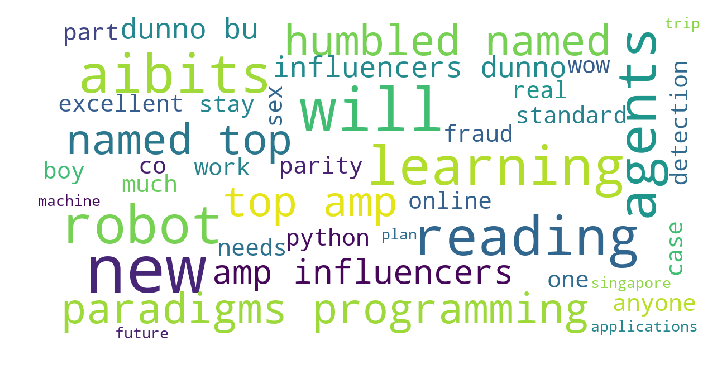

In [20]:
# show WordCloud for 'all_years' tweets
stopwords_wc = set(STOPWORDS)
display_wordcloud(all_years_clean['tweet_text'], file = 'all_years_cloud.png', stopwords = stopwords_wc,
                  bg_color = 'white', max_words = 40, random_state = 767)

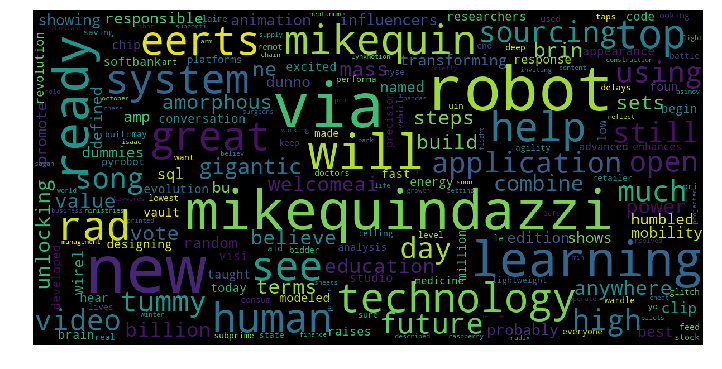

In [4]:
# show WordCloud for 'large_2019' tweets
display_wordcloud(large_2019_clean['tweet_text'], file = 'large_2019_cloud.png', 
                  stopwords = stopwords_wc, random_state = 767)

In [5]:
# generate document-term matrix for all_years tweets using CountVectorizer
all_years_doc_term1 = doc_term_matrix(all_years_clean['tweet_text'], 'CV')
all_years_doc_term1.head()

,aaaaai,aaaah,aaaai,aaai,aaga,aahahhahaha,aaron,abc,abdul,abends,...,zend,zero,zin,zju,zombie,zone,zuckerberg,zurich,zut,zypr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# generate document-term matrix for all_years tweets using TF-IDF Vectorizer
all_years_doc_term2 = doc_term_matrix(all_years_clean['tweet_text'], 'TFIDF')
all_years_doc_term2.head()

,aaaaai,aaaah,aaaai,aaai,aaga,aahahhahaha,aaron,abc,abdul,abends,...,zend,zero,zin,zju,zombie,zone,zuckerberg,zurich,zut,zypr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# generate document-term matrix for large_2019 tweets using CountVectorizer
large_2019_doc_term1 = doc_term_matrix(large_2019_clean['tweet_text'], 'CV')
large_2019_doc_term1.head()

,aaa,aapl,aayog,aba,abacus,abandoned,abandoning,abandonment,abated,abbeel,...,zone,zones,zoo,zoom,zoomex,zooming,zoubin,zouden,zunenshine,zycus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# generate document-term matrix for large_2019 tweets using TF-IDF Vectorizer
large_2019_doc_term2 = doc_term_matrix(large_2019_clean['tweet_text'], 'TFIDF')
large_2019_doc_term2.head()

,aaa,aapl,aayog,aba,abacus,abandoned,abandoning,abandonment,abated,abbeel,...,zone,zones,zoo,zoom,zoomex,zooming,zoubin,zouden,zunenshine,zycus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# LSA of all_years tweets with CountVectorizer
lsa = TruncatedSVD(2, random_state = 767)
all_years_doc_topic = lsa.fit_transform(all_years_doc_term1)
print('Variance Explained: ', lsa.explained_variance_) 
print('Percent Variance Explained: ', lsa.explained_variance_ratio_)
print('Singular Values: ', lsa.singular_values_)
display_topics_svd(lsa, all_years_doc_term1.columns, 25)

Variance Explained:  [0.14658742 0.1121693 ]
Percent Variance Explained:  [0.024585   0.01881254]
Singular Values:  [29.33484283 26.11955781]

Topic 1
stupidity, natural, match, beats, work, usually, real, fortune, unknown, don, lol, probably, sadly, human, new, year, tech, language, day, amp, looking, enthusiast, technology, forward, think

Topic 2
amp, learning, influencers, buy, trust, stuff, named, met, ends, mother, gentleman, dunno, sherpas, humbled, gesture, ethos, human, machine, year, new, future, technology, brain, http, deep


In [10]:
# LSA of all_years tweets with TF-IDF vectorizer
lsa = TruncatedSVD(2, random_state = 767)
all_years_doc_topic = lsa.fit_transform(all_years_doc_term2)
print('Variance Explained: ', lsa.explained_variance_) 
print('Percent Variance Explained: ', lsa.explained_variance_ratio_)
print('Singular Values: ', lsa.singular_values_)
display_topics_svd(lsa, all_years_doc_term2.columns, 25)

Variance Explained:  [0.03987569 0.01844867]
Percent Variance Explained:  [0.04087872 0.01891272]
Singular Values:  [15.18410798 10.24709091]

Topic 1
stupidity, match, natural, fortune, beats, usually, unknown, real, work, don, lol, sadly, probably, better, aii, think, forward, hear, looking, enthusiast, true, revellers, compared, day, author

Topic 2
surge, future, near, facebook, fast, company, develop, used, human, brain, mimics, advertising, city, big, computer, coming, trends, just, vision, mogelijkheden, change, algorithms, wow, robots, technology


In [11]:
# LSA of large_2019 tweets with CountVectorizer
lsa = TruncatedSVD(2, random_state = 767)
large_2019_doc_topic = lsa.fit_transform(large_2019_doc_term1)
print('Variance Explained: ', lsa.explained_variance_) 
print('Percent Variance Explained: ', lsa.explained_variance_ratio_)
print('Singular Values: ', lsa.singular_values_)
display_topics_svd(lsa, large_2019_doc_term1.columns, 25)

Variance Explained:  [0.10649434 0.09525933]
Percent Variance Explained:  [0.01243146 0.01111995]
Singular Values:  [39.09191229 32.46063242]

Topic 1
amp, data, learning, new, machine, future, using, use, help, learn, world, technology, read, time, deep, tech, big, join, like, business, research, need, work, today, human

Topic 2
learning, data, machine, new, deep, using, big, use, science, learn, help, business, read, analytics, article, models, future, better, research, digital, make, world, used, companies, technology


In [12]:
# LSA of large_2019 tweets with TF-IDF vectorizer
lsa = TruncatedSVD(2, random_state = 767)
large_2019_doc_topic = lsa.fit_transform(large_2019_doc_term2)
print('Variance Explained: ', lsa.explained_variance_) 
print('Percent Variance Explained: ', lsa.explained_variance_ratio_)
print('Singular Values: ', lsa.singular_values_)
display_topics_svd(lsa, large_2019_doc_term2.columns, 25)

Variance Explained:  [0.00319164 0.00420657]
Percent Variance Explained:  [0.00321446 0.00423664]
Singular Values:  [8.05969213 6.92570976]

Topic 1
learning, machine, amp, data, future, new, deep, learn, use, read, help, using, business, world, technology, big, know, industry, article, like, work, need, human, latest, improve

Topic 2
learning, machine, deep, python, consumption, reinforcement, meta, neural, difference, models, red, algorithms, introduction, revolutionizing, hamper, engineer, transfer, derisking, visualization, tiny, particles, genetic, apis, burden, lifted


In [13]:
# LSA of large_2019 dataset with TF-IDF Vectorizer with 5 topics
lsa = TruncatedSVD(5, random_state = 767)
large_2019_doc_topic = lsa.fit_transform(large_2019_doc_term2)
display_topics_svd(lsa, large_2019_doc_term2.columns, 25)


Topic 1
learning, machine, amp, data, future, new, deep, learn, read, use, help, using, business, world, technology, big, know, article, industry, human, like, work, need, latest, great

Topic 2
learning, machine, deep, python, consumption, reinforcement, meta, neural, difference, models, algorithms, red, revolutionizing, introduction, hamper, engineer, transfer, derisking, visualization, tiny, particles, genetic, burden, lifted, apis

Topic 3
future, deepmind, losses, learning, machine, wired, trends, automated, emerging, deep, shaping, jobs, work, role, commerce, statistics, cybersecurity, direction, aiot, robotics, change, charts, alphabet, marcus, tied

Topic 4
amp, future, powered, join, learning, deepmind, courses, losses, machine, takeaways, deep, marketing, fradelos, georgios, otc, cse, vsblty, vsby, vsbgf, matthew, need, best, eert, discuss, webinar

Topic 5
data, big, amp, future, science, analytics, driven, deepmind, losses, analyst, scientists, scientist, diabetes, complex

In [14]:
# LSA of large_2019 dataset with TF-IDF Vectorizer with 10 topics
lsa = TruncatedSVD(10, random_state = 767)
large_2019_doc_topic = lsa.fit_transform(large_2019_doc_term2)
display_topics_svd(lsa, large_2019_doc_term2.columns, 25)


Topic 1
learning, machine, amp, data, future, new, deep, learn, read, use, help, using, business, world, technology, big, know, article, industry, like, work, need, human, latest, improve

Topic 2
learning, machine, deep, python, consumption, reinforcement, meta, neural, difference, models, algorithms, red, revolutionizing, introduction, hamper, engineer, transfer, derisking, visualization, tiny, particles, genetic, burden, lifted, apis

Topic 3
future, deepmind, losses, learning, machine, wired, trends, deep, automated, emerging, shaping, jobs, work, change, role, statistics, commerce, cybersecurity, direction, aiot, robotics, alphabet, charts, marcus, tied

Topic 4
amp, future, join, powered, deepmind, learning, losses, courses, deep, machine, takeaways, fradelos, georgios, otc, vsby, vsblty, vsbgf, cse, matthew, webinar, eert, marketing, discuss, innovation, conference

Topic 5
data, big, amp, future, science, analytics, learn, driven, analyst, scientists, scientist, diabetes, comp

In [15]:
# LSA of large_2019 with TF-IDF Vectorizer with 25 topics
lsa = TruncatedSVD(25, random_state = 767)
large_2019_doc_topic = lsa.fit_transform(large_2019_doc_term2)
display_topics_svd(lsa, large_2019_doc_term2.columns, 25)


Topic 1
learning, machine, amp, data, future, new, deep, learn, read, use, help, using, business, world, technology, big, know, article, industry, like, need, work, human, latest, great

Topic 2
learning, machine, deep, python, consumption, reinforcement, meta, neural, difference, models, red, algorithms, revolutionizing, introduction, hamper, engineer, transfer, derisking, visualization, tiny, particles, genetic, burden, lifted, apis

Topic 3
future, deepmind, losses, learning, machine, wired, trends, deep, automated, emerging, work, shaping, jobs, role, change, statistics, commerce, cybersecurity, direction, aiot, robotics, charts, alphabet, marcus, tied

Topic 4
amp, future, powered, deepmind, join, learning, courses, losses, machine, takeaways, deep, fradelos, georgios, otc, vsbgf, vsblty, vsby, cse, matthew, marketing, eert, best, innovation, discuss, webinar

Topic 5
data, big, amp, future, science, analytics, driven, deepmind, losses, learn, analyst, scientists, scientist, diab

In [16]:
# NMF of all_years dataset with CountVectorizer with 10 topics
nmf_model = NMF(10, random_state = 767)
all_years_doc_topic = nmf_model.fit_transform(all_years_doc_term1)
display_topics_svd(nmf_model, all_years_doc_term1.columns, 25)


Topic 1
stupidity, natural, match, beats, work, usually, real, fortune, unknown, don, lol, probably, sadly, language, tech, enthusiast, looking, day, forward, think, does, true, instead, feed, tversky

Topic 2
amp, learning, buy, trust, named, stuff, influencers, met, ends, mother, dunno, gesture, gentleman, sherpas, ethos, humbled, online, download, read, theory, conference, encyclopedia, gold, winner, congrats

Topic 3
human, brain, mimics, technology, piece, central, summary, inspiration, impact, interaction, finally, software, seamlessly, assists, interacts, means, humans, future, everyday, intelligent, lives, like, chip, computer, need

Topic 4
future, facebook, near, surge, company, fast, develop, used, technology, computer, trends, just, tech, big, says, coming, change, article, role, interesting, talks, acorn, inventor, hauser, herman

Topic 5
robot, lab, university, shows, rich, roboy, incredibly, creepy, turn, slashgear, mcglaun, shane, like, robotics, remote, lives, canada,

In [17]:
# NMF of all_years dataset with TF-IDF Vectorizer with 10 topics
nmf_model = NMF(10, random_state = 767)
all_years_doc_topic = nmf_model.fit_transform(all_years_doc_term2)
display_topics_svd(nmf_model, all_years_doc_term2.columns, 25)


Topic 1
stupidity, match, natural, fortune, beats, usually, unknown, real, work, don, lol, sadly, probably, better, aii, think, forward, hear, looking, enthusiast, true, compared, revellers, author, day

Topic 2
surge, near, future, facebook, fast, company, develop, used, advertising, city, big, computer, trends, coming, vision, just, mogelijkheden, change, algorithms, wow, article, tech, technology, says, channel

Topic 3
brain, mimics, human, means, software, everyday, intelligent, digg, chip, modeled, lives, technology, live, reading, techradar, hack, like, warning, central, inspiration, summary, piece, com, interaction, seamlessly

Topic 4
interstellar, flight, complex, robots, teach, replacing, south, english, korea, gather, video, jobs, eloring, mit, sex, today, rise, hacked, murder, taking, people, ready, friday, progressed, wonder

Topic 5
happen, best, machines, intelligent, humans, means, software, everyday, movie, think, essential, lives, work, going, algorithm, courses, po

In [18]:
# NMF of large_2019 dataset with CountVectorizer with 10 topics
nmf_model = NMF(10, random_state = 767)
large_2019_doc_topic = nmf_model.fit_transform(large_2019_doc_term1)
display_topics_svd(nmf_model, large_2019_doc_term1.columns, 25)


Topic 1
amp, join, tech, need, innovation, improve, ceo, conference, powered, research, medical, latest, great, solutions, webinar, like, leaders, free, eert, interested, event, live, otc, vsbgf, vsby

Topic 2
learning, machine, deep, models, research, article, meta, reinforcement, algorithms, neural, tool, google, science, python, consumption, researchers, better, development, uses, job, improve, energy, engineer, black, students

Topic 3
data, big, science, analytics, driven, digital, center, analysis, great, business, models, cloud, transformation, companies, scientists, applications, complex, does, platform, health, need, value, making, used, ibm

Topic 4
new, technology, research, post, lab, tech, work, health, york, brain, business, digital, national, report, type, just, nhs, develop, technologies, service, healthcare, like, development, shows, companies

Topic 5
future, deepmind, technology, losses, work, today, trends, jobs, change, like, business, role, year, look, industry, 

In [19]:
# NMF of large_2019 dataset with TF-IDF Vectorizer with 10 topics
nmf_model = NMF(10, random_state = 767)
large_2019_doc_topic = nmf_model.fit_transform(large_2019_doc_term2)
display_topics_svd(nmf_model, large_2019_doc_term2.columns, 25)


Topic 1
use, ways, healthcare, cases, industry, make, time, customer, improve, today, real, technologies, companies, best, cmpa, learn, case, supports, appropriate, eerience, systems, create, thrive, list, revolutionizing

Topic 2
learning, machine, deep, python, algorithms, neural, consumption, applications, models, reinforcement, meta, difference, using, improve, development, revolutionizing, guide, projects, manufacturing, engineer, research, introduction, marketing, tools, google

Topic 3
future, deepmind, losses, work, trends, wired, industry, jobs, technology, today, emerging, change, automated, role, human, shaping, healthcare, cybersecurity, commerce, statistics, digital, robotics, automation, aiot, play

Topic 4
amp, join, powered, best, courses, conference, great, marketing, key, innovation, security, learn, takeaways, tech, live, webinar, human, improve, need, solutions, talk, team, ceo, leaders, discuss

Topic 5
data, big, science, analytics, learn, driven, using, great, s

In [21]:
# LDA of all_years dataset with CountVectorizer with 5 topics
display_topics_lda(all_years_clean['tweet_text'], 5, 25, 'CV')

[(0,
  '0.008*"internet" + 0.007*"like" + 0.007*"latest" + 0.006*"movie" + 0.006*"computing" + 0.006*"did" + 0.006*"breakthroughs" + 0.006*"study" + 0.005*"new" + 0.005*"watching"'),
 (1,
  '0.041*"amp" + 0.028*"year" + 0.022*"new" + 0.008*"http" + 0.007*"people" + 0.006*"data" + 0.006*"real" + 0.006*"trust" + 0.006*"help" + 0.006*"make"'),
 (2,
  '0.023*"robots" + 0.021*"robot" + 0.014*"complex" + 0.011*"lab" + 0.011*"flight" + 0.011*"interstellar" + 0.010*"university" + 0.010*"shows" + 0.009*"rich" + 0.009*"roboy"'),
 (3,
  '0.034*"future" + 0.034*"human" + 0.018*"brain" + 0.015*"facebook" + 0.014*"humans" + 0.014*"best" + 0.013*"machines" + 0.012*"intelligent" + 0.012*"near" + 0.011*"technology"'),
 (4,
  '0.038*"learning" + 0.034*"stupidity" + 0.033*"natural" + 0.027*"match" + 0.022*"machine" + 0.011*"deep" + 0.007*"buy" + 0.007*"named" + 0.005*"ends" + 0.005*"mother"')]

In [22]:
# LDA of all_years dataset with TF-IDF Vectorizer with 5 topics
display_topics_lda(all_years_clean['tweet_text'], 5, 25, 'TFIDF')

[(0,
  '0.037*"stupidity" + 0.036*"natural" + 0.034*"match" + 0.008*"trends" + 0.007*"http" + 0.006*"nglnd" + 0.005*"real" + 0.005*"work" + 0.005*"beats" + 0.005*"classic"'),
 (1,
  '0.020*"amp" + 0.014*"year" + 0.009*"learning" + 0.008*"robot" + 0.007*"machine" + 0.006*"lab" + 0.006*"university" + 0.005*"shows" + 0.005*"rich" + 0.005*"new"'),
 (2,
  '0.012*"robots" + 0.012*"best" + 0.011*"complex" + 0.011*"humans" + 0.011*"flight" + 0.011*"interstellar" + 0.010*"daily" + 0.009*"machines" + 0.009*"happen" + 0.008*"intelligent"'),
 (3,
  '0.009*"breakthroughs" + 0.007*"age" + 0.006*"business" + 0.006*"tech" + 0.004*"watching" + 0.004*"types" + 0.004*"companies" + 0.003*"computing" + 0.003*"latest" + 0.003*"coming"'),
 (4,
  '0.018*"human" + 0.014*"future" + 0.014*"brain" + 0.011*"facebook" + 0.010*"near" + 0.010*"mimics" + 0.010*"surge" + 0.008*"new" + 0.005*"news" + 0.004*"need"')]

In [23]:
# LDA of large_2019 dataset with CountVectorizer with 5 topics
display_topics_lda(large_2019_clean['tweet_text'], 5, 25, 'CV')

[(0,
  '0.009*"future" + 0.008*"amp" + 0.008*"data" + 0.008*"new" + 0.007*"world" + 0.007*"people" + 0.006*"technology" + 0.006*"use" + 0.005*"good" + 0.005*"right"'),
 (1,
  '0.009*"bader" + 0.009*"gerald" + 0.008*"data" + 0.007*"new" + 0.006*"tech" + 0.006*"edge" + 0.006*"startup" + 0.005*"news" + 0.005*"raises" + 0.005*"reality"'),
 (2,
  '0.012*"future" + 0.010*"amp" + 0.008*"human" + 0.007*"read" + 0.007*"world" + 0.006*"new" + 0.006*"report" + 0.006*"based" + 0.005*"real" + 0.005*"market"'),
 (3,
  '0.009*"help" + 0.009*"business" + 0.008*"use" + 0.006*"customer" + 0.006*"using" + 0.005*"data" + 0.005*"amp" + 0.005*"way" + 0.005*"today" + 0.005*"new"'),
 (4,
  '0.025*"learning" + 0.016*"machine" + 0.016*"amp" + 0.011*"new" + 0.010*"data" + 0.007*"deep" + 0.006*"learn" + 0.006*"know" + 0.006*"best" + 0.005*"look"')]

In [24]:
# LDA of large_2019 dataset with TF-IDF Vectorizer with 5 topics
display_topics_lda(large_2019_clean['tweet_text'], 5, 25, 'TFIDF')

[(0,
  '0.006*"amp" + 0.006*"future" + 0.005*"know" + 0.004*"use" + 0.004*"learning" + 0.004*"world" + 0.004*"technology" + 0.004*"new" + 0.004*"join" + 0.003*"data"'),
 (1,
  '0.003*"going" + 0.002*"cybersecurity" + 0.002*"workplace" + 0.002*"contact" + 0.002*"tech" + 0.002*"amp" + 0.002*"berlin" + 0.002*"videos" + 0.002*"new" + 0.002*"powered"'),
 (2,
  '0.005*"trends" + 0.004*"amp" + 0.004*"help" + 0.004*"business" + 0.004*"helps" + 0.004*"read" + 0.003*"today" + 0.003*"check" + 0.003*"digital" + 0.003*"new"'),
 (3,
  '0.006*"learning" + 0.006*"new" + 0.004*"startup" + 0.004*"data" + 0.004*"based" + 0.004*"machine" + 0.004*"gerald" + 0.004*"bader" + 0.003*"using" + 0.003*"deep"'),
 (4,
  '0.003*"latest" + 0.003*"facebook" + 0.003*"future" + 0.003*"lab" + 0.003*"new" + 0.003*"banks" + 0.003*"privacy" + 0.003*"amp" + 0.003*"users" + 0.003*"meeting"')]